# **TANGOS: The Agile Numerical Galaxy Organisation System**


## Step 1: Installation
To install: <br>
\>>git clone https://github.com/anchwr/tangos.git <br>
\>>cd tangos <br>
\>>python setup.py develop <br>
This will install my fork of tangos, which works with Enzo outputs. You can install the public version of tangos by typing <br>
\>>pip install tangos <br>
but you won't be able to use certain functions (e.g., calculate_all) that need access to the handler class that was used to create the database. <br>
More detailed instructions can be found at: https://pynbody.github.io/tangos/index.html <br>

## Step 2: Download a database
Basic database containing info for Tempest RDs can be found at: https://github.com/foggie-sims/foggie/blob/master/foggie/halo_infos/008508/nref11c_nref9f/Tempest.9f11c.RD.db <br>(Size as of 8/2/2021: ~10 MB) <br> <br>
You'll also need to tell tangos where to find your database. Add the following lines to your .bashrc (.bash_profile, etc):<br>
export TANGOS_SIMULATION_FOLDER = /path/to/folder/containing/tangos/database/ <br>
export TANGOS_DB_CONNECTION = /path/to/folder/containing/tangos/database/Tempest.9f11c.RD.db <br>
So, for me, this is:<br>
export TANGOS_SIMULATION_FOLDER=/Users/Anna/Research/Outputs/tangostest/ <br>
export TANGOS_DB_CONNECTION=/Users/Anna/Research/Outputs/tangostest/Tempest.9f11c.RD.db


## Step 3: Check that you can load the database
(Source your .bashrc and reload this notebook if necessary) <br>


In [1]:
import tangos as db

Which simulations do we have access to? If all went well, you should see <Simulation("Tempest.9f11c.RD")>

In [2]:
db.all_simulations()

[<Simulation("Tempest.9f11c.RD")>]

Load the Tempest database:

In [3]:
sim = db.get_simulation('Tempest.9f11c.RD')

Check that you can see all of the timesteps (you should see a list showing RD0012-RD0042):

In [4]:
sim.timesteps

[<TimeStep 'Tempest.9f11c.RD/RD0012/RD0012' z=6.00 t=0.95 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0013/RD0013' z=5.00 t=1.19 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0014/RD0014' z=4.00 t=1.57 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0015/RD0015' z=3.50 t=1.83 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0016/RD0016' z=3.00 t=2.18 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0017/RD0017' z=2.75 t=2.40 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0018/RD0018' z=2.50 t=2.66 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0019/RD0019' z=2.25 t=2.96 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0020/RD0020' z=2.00 t=3.33 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0021/RD0021' z=1.75 t=3.78 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0022/RD0022' z=1.50 t=4.33 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0023/RD0023' z=1.40 t=4.59 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0024/RD0024' z=1.30 t=4.88 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0025/RD0025' z=1.20 t=5.19 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0026/RD0026' z=1.10 t=5.54 Gyr>,
 <TimeStep 'Tempest.9f11c.RD/RD0027/RD00

Let's look at RD0042. There are a couple of ways to select an individual timestep. My preferred way is just via indexing. There are 31 timesteps here total, so the most recent is:

In [5]:
sim[30]

<TimeStep 'Tempest.9f11c.RD/RD0042/RD0042' z=0.00 t=13.76 Gyr>

However, if you know the name of the timestep, but not its index, you can also access it that way:

In [6]:
db.get_timestep('Tempest.9f11c.RD/%42')

<TimeStep 'Tempest.9f11c.RD/RD0042/RD0042' z=0.00 t=13.76 Gyr>

We can access individual halos in much the same way:

In [7]:
sim[30][1]

<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_1' | NDM=281333 Nstar=0 Ngas=0>

and

In [8]:
db.get_halo('Tempest.9f11c.RD/%42/halo_1')

<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_1' | NDM=281333 Nstar=0 Ngas=0>

are equivalent. Tangos automatically sorts halos by the number of dark matter particles that they possess, so halo 1 is the most massive halo, halo 2 is the next most massive, and so on.

## Step 4: Look at what properties are actually stored in the database

The utility of tangos comes from the fact that you can calculate the same properties for every halo once, store them, and then rapidly access those properties without having to load the simulation itself into yt (or pynbody). You can check which properties exist for a given halo:

In [9]:
sim[30][1].keys()

['consistent_trees_id',
 'Mvir',
 'Mtot',
 'M200c',
 'Rvir',
 'X',
 'Y',
 'Z',
 'Spin_DM_B',
 'X_cu',
 'Y_cu',
 'Z_cu',
 'Center',
 'Center_cu',
 'M_gas',
 'M_coldgas',
 'M_star',
 'ContamFrac',
 'VX',
 'VY',
 'VZ',
 'consistent_trees_link',
 'consistent_trees_link',
 'consistent_trees_link']

These will vary depending on which halo finder was used on the original simulation and which custom properties your db creator has stored in the database. In this case, rockstar and consistent-trees have been used to find the halos and link them across timesteps. Many of the properties (e.g., Mvir, Center) come directly from the rockstar halo catalogs (albeit converted into physical units). Other properties (e.g., M_star, ContamFrac) are custom. Descriptions of each property and the relevant units are available at: https://github.com/foggie-sims/foggie/blob/master/foggie/halo_infos/008508/nref11c_nref9f/tangos.README.txt . I will do my best to keep this up to date!

We can calculate a single property for a single halo:

In [11]:
sim[30][1]['M_coldgas']

17251749934.381973

Or we can calculate multiple properties for every halo in this timestep simultaneously:

/var/folders/h4/tgpyd_z951x_9bzqftct7zxc00057b/T/ipykernel_97568/436268885.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(Mh),np.log10(Ms),'k.',markersize=13)


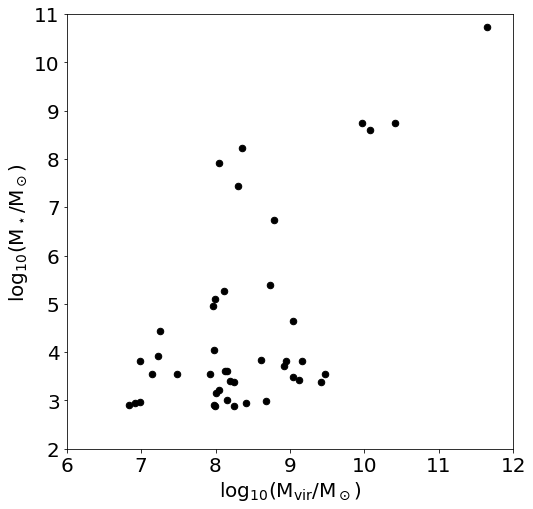

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

Mh, Ms = sim[30].calculate_all('Mvir','M_star')

plt.figure(figsize=(8,8))
plt.plot(np.log10(Mh),np.log10(Ms),'k.',markersize=13)
plt.xlabel('log$_{10}$(M$_\mathrm{vir}$/M$_\odot$)',fontsize=20)
plt.ylabel('log$_{10}$(M$_\star$/M$_\odot$)',fontsize=20)
plt.xlim(6,12)
plt.ylim(2,11)
plt.show()

Something to note: when we call "calculate_all", tangos processes the halos in the order they were read in from the halo catalog, NOT the order they are in the database. Each halo has a few different IDs. The important ones here are halo_number (the number of the halo in the database) and finder_id (the number of the halo in the rockstar halo catalog). You can see that these differ pretty drastically:

In [13]:
print (sim[30][1].halo_number)
print (sim[30][1].finder_id)

1
182


Because of this, it's a good idea to explicitly tell tangos to sort by halo_number if you decide to call calculate_all but still want to be able to associate the resultant quantities with individual halos:

In [14]:
sim[22].calculate_all('M_gas',order_by_halo_number=True)

[array([2.27194882e+10, 1.69442767e+09, 1.49741016e+09, 1.59730033e+09,
        2.88401629e+08, 1.04416608e+08, 1.31866253e+08, 2.90140094e+08,
        8.22376238e+07, 9.02207455e+07, 5.00767987e+07, 1.51034933e+07,
        1.24996556e+07, 6.61992470e+08, 7.77759838e+07, 1.58147744e+07,
        1.76305579e+07, 3.39738144e+06, 1.66307828e+07, 1.84958411e+07,
        1.88451066e+07, 1.65517428e+06, 1.18559889e+07, 3.69920389e+07,
        2.94355971e+06, 1.02698837e+07, 2.64034482e+06, 6.25229200e+06,
        1.21261039e+07, 6.07786019e+05, 4.57284212e+06, 2.33373047e+05,
        5.61788149e+05, 5.40442750e+05, 4.88655279e+06, 2.44362184e+06,
        2.38787209e+06, 3.35660099e+06, 1.10574368e+06, 9.46720729e+05,
        4.62339222e+05, 3.73080781e+06, 2.31156433e+06, 5.99246043e+05,
        1.17684332e+05, 5.29542807e+05, 8.77296256e+05, 2.11929221e+05,
        6.73667795e+06, 1.46960738e+04, 1.47887638e+05, 1.79860590e+05,
        1.89173510e+06, 1.26285096e+06, 1.78241707e+06, 1.529374

In addition to the properties listed via halo.keys(), there may be "live calculations" available. These are properties that the database doesn't explicitly store, but which can be calculated entirely from existent properties. There are a number that are available by default (a full list can be found at https://pynbody.github.io/tangos/live_calculation.html), but your db creator may also have made some custom live calculations. Because these can be called at any time (and therefore don't need to have been available at the time that the db was created), they should work on any database you have access to so long as the necessary properties are present. For instance, my branch of tangos includes live calculations to identify satellites and hosts:

In [16]:
sats = sim[30][2].calculate('Satellites()')
print (sats)

[<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_5' | NDM=6657 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_24' | NDM=510 Nstar=0 Ngas=0>]


This calculation requires only the 'Center', 'Rvir', and 'Mvir' properties. Note that what's been returned is actually an array of halo objects. The properties of the halos are directly accessible through these, so the following two lines are equivalent:

In [17]:
sats[1].calculate('Hosts()')

array([<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_2' | NDM=12818 Nstar=0 Ngas=0>],
      dtype=object)

In [18]:
sim[30][5].calculate('Hosts()')

array([<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_2' | NDM=12818 Nstar=0 Ngas=0>],
      dtype=object)

## Step 5: Travel through time

Tangos links halos across time either through its own bridging program or by reading in output from a merger tree. This allows us to calculate properties for halos at multiple points in time. We can go just one timestep back:

In [19]:
sim[30][3].calculate('earlier(1).Mvir')

11447050359.71223

Or we can look at the evolution of this property over every available timestep:

In [21]:
sim[30][3].calculate_for_progenitors('Mvir')

[array([1.18024460e+10, 1.14470504e+10, 1.14387050e+10, 1.09735252e+10,
        9.71438849e+09, 9.34230216e+09, 9.01453237e+09, 8.19266187e+09,
        7.90949640e+09, 7.75251799e+09, 7.50676259e+09, 7.36661871e+09,
        7.06388489e+09, 6.86402878e+09, 6.81956835e+09, 6.70992806e+09,
        6.75151079e+09, 6.66546763e+09, 6.16014388e+09, 4.20805755e+09,
        3.57079137e+09, 2.76561151e+09])]

Note: the value for the timestep you started with (RD0042) is the first entry while the value for the earliest timestep this halo is traced to (RD0021) is the last entry.

We can also go forwards in time:

Text(0, 0.5, 'log$_{10}$(M$_\\mathrm{vir}$/M$_\\odot$)')

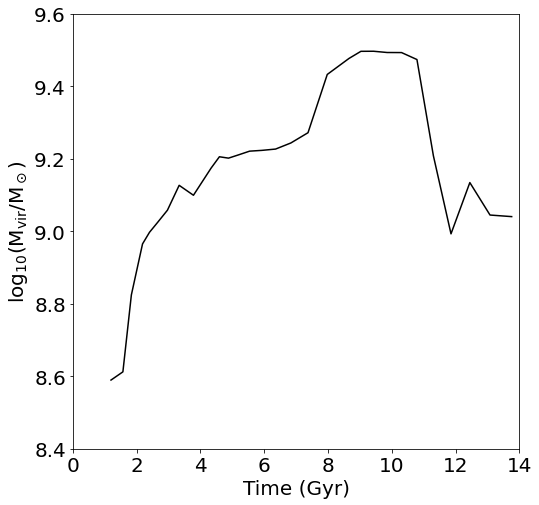

In [22]:
mv, t = sim[1][18].calculate_for_descendants('Mvir','t()')
plt.figure(figsize=(8,8))
plt.plot(t,np.log10(mv),'k-')
plt.xlim(0,14)
plt.ylim(8.4,9.6)
plt.xlabel('Time (Gyr)',fontsize=20)
plt.ylabel('log$_{10}$(M$_\mathrm{vir}$/M$_\odot$)',fontsize=20)

We can also look at how mass grows by directly looking at mergers. There are a number of ways to do this. If you just want to know if a halo experienced a merger between one timestep and the previous one, you can just look at the halo keys. If you see more than one 'consistent_trees_link' entry, there's been a recent merger!

In [23]:
sim[30][4].keys()

['consistent_trees_id',
 'Mvir',
 'Mtot',
 'M200c',
 'Rvir',
 'X',
 'Y',
 'Z',
 'Spin_DM_B',
 'X_cu',
 'Y_cu',
 'Z_cu',
 'Center',
 'Center_cu',
 'M_gas',
 'M_coldgas',
 'M_star',
 'ContamFrac',
 'VX',
 'VY',
 'VZ',
 'consistent_trees_link',
 'consistent_trees_link']

Consistent_trees_link returns halo objects from the previous timestep that are part of the halo in the current timestep, so you can use it directly to access the properties of the merging halos. 

In [24]:
sim[30][4]['consistent_trees_link']

[<Halo 'Tempest.9f11c.RD/RD0041/RD0041/halo_5' | NDM=7591 Nstar=0 Ngas=0>,
 <Halo 'Tempest.9f11c.RD/RD0041/RD0041/halo_55' | NDM=216 Nstar=0 Ngas=0>]

For instance, we can find out the mass ratio of the merging halos:

In [25]:
sim[30][4]['consistent_trees_link'][0]['Mvir']/sim[30][4]['consistent_trees_link'][1]['Mvir']

49.73221117061974

You can also grab the entire merger history of a halo at once

In [26]:
import tangos.examples.mergers as tmer

z,rat,hobj = tmer.get_mergers_of_major_progenitor(sim[30][1])
print ('Redshifts of mergers:\n',z)
print ('Mass ratios of mergers:\n',rat)
print ('Halos involved in mergers:\n',hobj)

Redshifts of mergers:
 [0.         0.         0.04999999 0.04999999 0.04999999 0.09999997
 0.09999997 0.09999997 0.09999997 0.09999997 0.09999997 0.09999997
 0.09999997 0.09999997 0.09999997 0.09999997 0.09999997 0.09999997
 0.09999997 0.19999999 0.19999999 0.19999999 0.19999999 0.19999999
 0.24999999 0.24999999 0.24999999 0.24999999 0.24999999 0.24999999
 0.24999999 0.29999997 0.29999997 0.34999998 0.39999997 0.39999997
 0.39999997 0.39999997 0.44999996 0.44999996 0.44999996 0.44999996
 0.44999996 0.44999996 0.49999999 0.49999999 0.49999999 0.49999999
 0.59999997 0.59999997 0.69999999 0.69999999 0.69999999 0.69999999
 0.69999999 0.69999999 0.69999999 0.69999999 0.69999999 0.79999998
 0.79999998 0.79999998 0.79999998 0.79999998 0.79999998 0.79999998
 0.79999998 0.79999998 0.79999998 0.79999998 0.79999998 0.79999998
 0.79999998 0.89999999 0.89999999 0.89999999 0.89999999 0.89999999
 0.89999999 0.99999996 0.99999996 0.99999996 0.99999996 0.99999996
 0.99999996 1.09999991 1.09999991 1.099

This is a fairly complex merger history and likely better processed visually. We can do that by launching tangos' web server:<br>
\>>tangos serve <br>
You should see something like "Serving on http://555.5.5.5:6543". Enter the address into your web browser and click on the simulation you want, followed by the timestep and the halo. Clicking on the circle next to "merger tree" will give you a visual representation of your halo's merger history. You can also plot just about every other quantity in the database against time (or any other quantity), too!

## Step 6: Use tangos and yt together

Let's go back to the halo that we traced forwards in time a few steps ago. We can see that this halo loses mass, presumably through tidal stripping. Thus far, we've done all of our analysis without accessing the actual simulation data or loading in yt. However, if we want to visualize the tidal debris, we'll need to use both tangos and yt. Using tangos, we can identify when the halo was at its maximum mass, where it was located at that time, and how large it was.

In [ ]:
hn,rvir,cen,mv = sim[1][18].calculate_for_descendants('halo_number()','Rvir','Center_cu','Mvir')
maxm = np.argmax(mv)
print (sim[int(1+maxm)][int(hn[maxm])])
r = rvir[maxm]
c = cen[maxm]

Using yt, we can read in all of the particles that belonged to the halo at this time by creating a sphere of radius r at point c.

In [ ]:
import yt
from yt.units.yt_array import YTQuantity
from yt.data_objects.particle_filters import add_particle_filter

ds = yt.load('/Volumes/Rapid/Tempest/nref9f_nref11c/RD0034/RD0034')
ad = ds.all_data()

halo = ds.sphere(center=c,radius=YTQuantity(r,'kpc'))

h_stars = halo['nbody','particle_index'][halo['nbody','particle_type']==2]
h_dm = halo['nbody','particle_index'][halo['nbody','particle_type']==4]

Now let's see where they are at z=0 with respect to Tempest:

In [ ]:
def HaloStars(pfilter, data):
    filter = np.isin(data['nbody','particle_index'],h_stars)
    return filter

add_particle_filter("halo_stars", function=HaloStars, filtered_type='nbody', \
                    requires=["particle_index"])

def HaloDM(pfilter, data):
    filter = np.isin(data['nbody','particle_index'],h_dm) 
    return filter

add_particle_filter("halo_dm", function=HaloDM, filtered_type='nbody', \
                    requires=["particle_index"])

In [ ]:
ds = yt.load('/Volumes/Rapid/Tempest/nref9f_nref11c/RD0042/RD0042')
ad = ds.all_data()

ds.add_particle_filter('halo_stars')
ds.add_particle_filter('halo_dm')

TempestCenter = sim[30][1]['Center_cu']
TempestRadius = sim[30][1]['Rvir']

GuessReg = ds.sphere(TempestCenter,radius=(500,'kpc'))

xpos_dm = YTQuantity(sim[30][1]['X']*1000,'kpc')-GuessReg['halo_dm','particle_position_x'].in_units('kpc')
ypos_dm = YTQuantity(sim[30][1]['Y']*1000,'kpc')-GuessReg['halo_dm','particle_position_y'].in_units('kpc')
zpos_dm = YTQuantity(sim[30][1]['Z']*1000,'kpc')-GuessReg['halo_dm','particle_position_z'].in_units('kpc')
xpos_stars = YTQuantity(sim[30][1]['X']*1000,'kpc')-GuessReg['halo_stars','particle_position_x'].in_units('kpc')
ypos_stars = YTQuantity(sim[30][1]['Y']*1000,'kpc')-GuessReg['halo_stars','particle_position_y'].in_units('kpc')
zpos_stars = YTQuantity(sim[30][1]['Z']*1000,'kpc')-GuessReg['halo_stars','particle_position_z'].in_units('kpc')

In [ ]:
f1 = plt.figure(figsize=(8,8))
plt.plot(xpos_dm,ypos_dm,'k.',markersize=10)
plt.plot(xpos_stars,ypos_stars,'r.',markersize=8)
Tempcir = plt.Circle((0,0),TempestRadius,color='b',fill=False)
f1.gca().add_artist(Tempcir)
plt.xlabel('x/kpc', fontsize=20)
plt.ylabel('y/kpc', fontsize=20)
plt.show()

f2 = plt.figure(figsize=(8,8))
plt.plot(ypos_dm,zpos_dm,'k.',markersize=10)
plt.plot(ypos_stars,zpos_stars,'r.',markersize=8)
Tempcir = plt.Circle((0,0),TempestRadius,color='b',fill=False)
f2.gca().add_artist(Tempcir)
plt.xlabel('y/kpc', fontsize=20)
plt.ylabel('z/kpc', fontsize=20)
plt.show()

f2 = plt.figure(figsize=(8,8))
plt.plot(xpos_dm,zpos_dm,'k.',markersize=10)
plt.plot(xpos_stars,zpos_stars,'r.',markersize=8)
Tempcir = plt.Circle((0,0),TempestRadius,color='b',fill=False)
f2.gca().add_artist(Tempcir)
plt.xlabel('x/kpc', fontsize=20)
plt.ylabel('z/kpc', fontsize=20)
plt.show()

**There are also plenty of other ways to use tangos! A more complete set of tutorials can be found at** https://pynbody.github.io/tangos/data_exploration.html